# Objective and Questions
- Perform a deeper analysis of customer demographics and purchasing patterns. Use machine learning to build and compare 3 predictive models: Decision Tree, Random Forest, and Gradient Boosting.
- Question 1: Are there differences in the age of customers between regions? If so, can we predict the age of a customer in a region based on other demographic data? <br> 
- Question 2: Is there any correlation between age of a customer and if the transaction was made online or in the store? Do any other factors predict if a customer will buy online or in our stores?


# Import Modules

In [290]:
#import basic data science modules

import numpy as np
import pandas as pd
import pandas_profiling 
import matplotlib.pyplot as plt
import seaborn as sn

#import scikit learn modules

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#helpers
%matplotlib inline

# Import data
Import data and take a look at data frame

In [291]:
#import data -- I created a new file using data.to_csv() with cleaned data from Task 1
#after looking at the header, I see that saving the file created a new unnamed column, which I will have to get rid of

data = pd.read_csv('Cleaned_Demographic_Data.csv')
data.head()

,Unnamed: 0,in-store,age,items,amount,region
0,0,0,37,4,281.03,2
1,1,0,35,2,219.51,2
2,2,1,45,3,1525.70,4
3,3,1,46,3,715.25,3
4,4,1,33,4,1937.50,1


In [292]:
#drop the unnamed column

data = data.drop(['Unnamed: 0'], axis = 1)

In [293]:
#check dataframe

data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [294]:
#take a look at data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79979 entries, 0 to 79978
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


# Model Building
## Feature Selection

In [295]:
#select the features (independent variables)

X = data.iloc[:,0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [296]:
#select the dependent variable

y = data['region']
y.head()

0    2
1    2
2    4
3    3
4    1
Name: region, dtype: int64

## Train Test Split

In [297]:
#use train/test split to divide our data into 70% training data, and 30% testing data
#random_state ensures that data is randomly stratified in order to prevent bias from how data is ordered

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

## Apply algorithm and make predictions

In [298]:
#apply the algorithm to the training set to build a model
#Modeling (Classification)

algo = DecisionTreeClassifier()
model = algo.fit(X_train, y_train)

In [299]:
#now the model is trained, and we need to use it on the testing set to make predictions before it is assessed
#Predictions

pred = model.predict(X_test)

## Classification Report

In [300]:
#print out classification report from the predictions that were just made

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.40      0.39      0.39      4838
           2       0.91      0.90      0.91      5979
           3       0.37      0.38      0.37      5391
           4       0.53      0.53      0.53      7786

    accuracy                           0.56     23994
   macro avg       0.55      0.55      0.55     23994
weighted avg       0.56      0.56      0.56     23994



# Decision Tree
## Plot Tree

In [301]:
#vizualize the decision tree
#import another module

from sklearn.tree import plot_tree

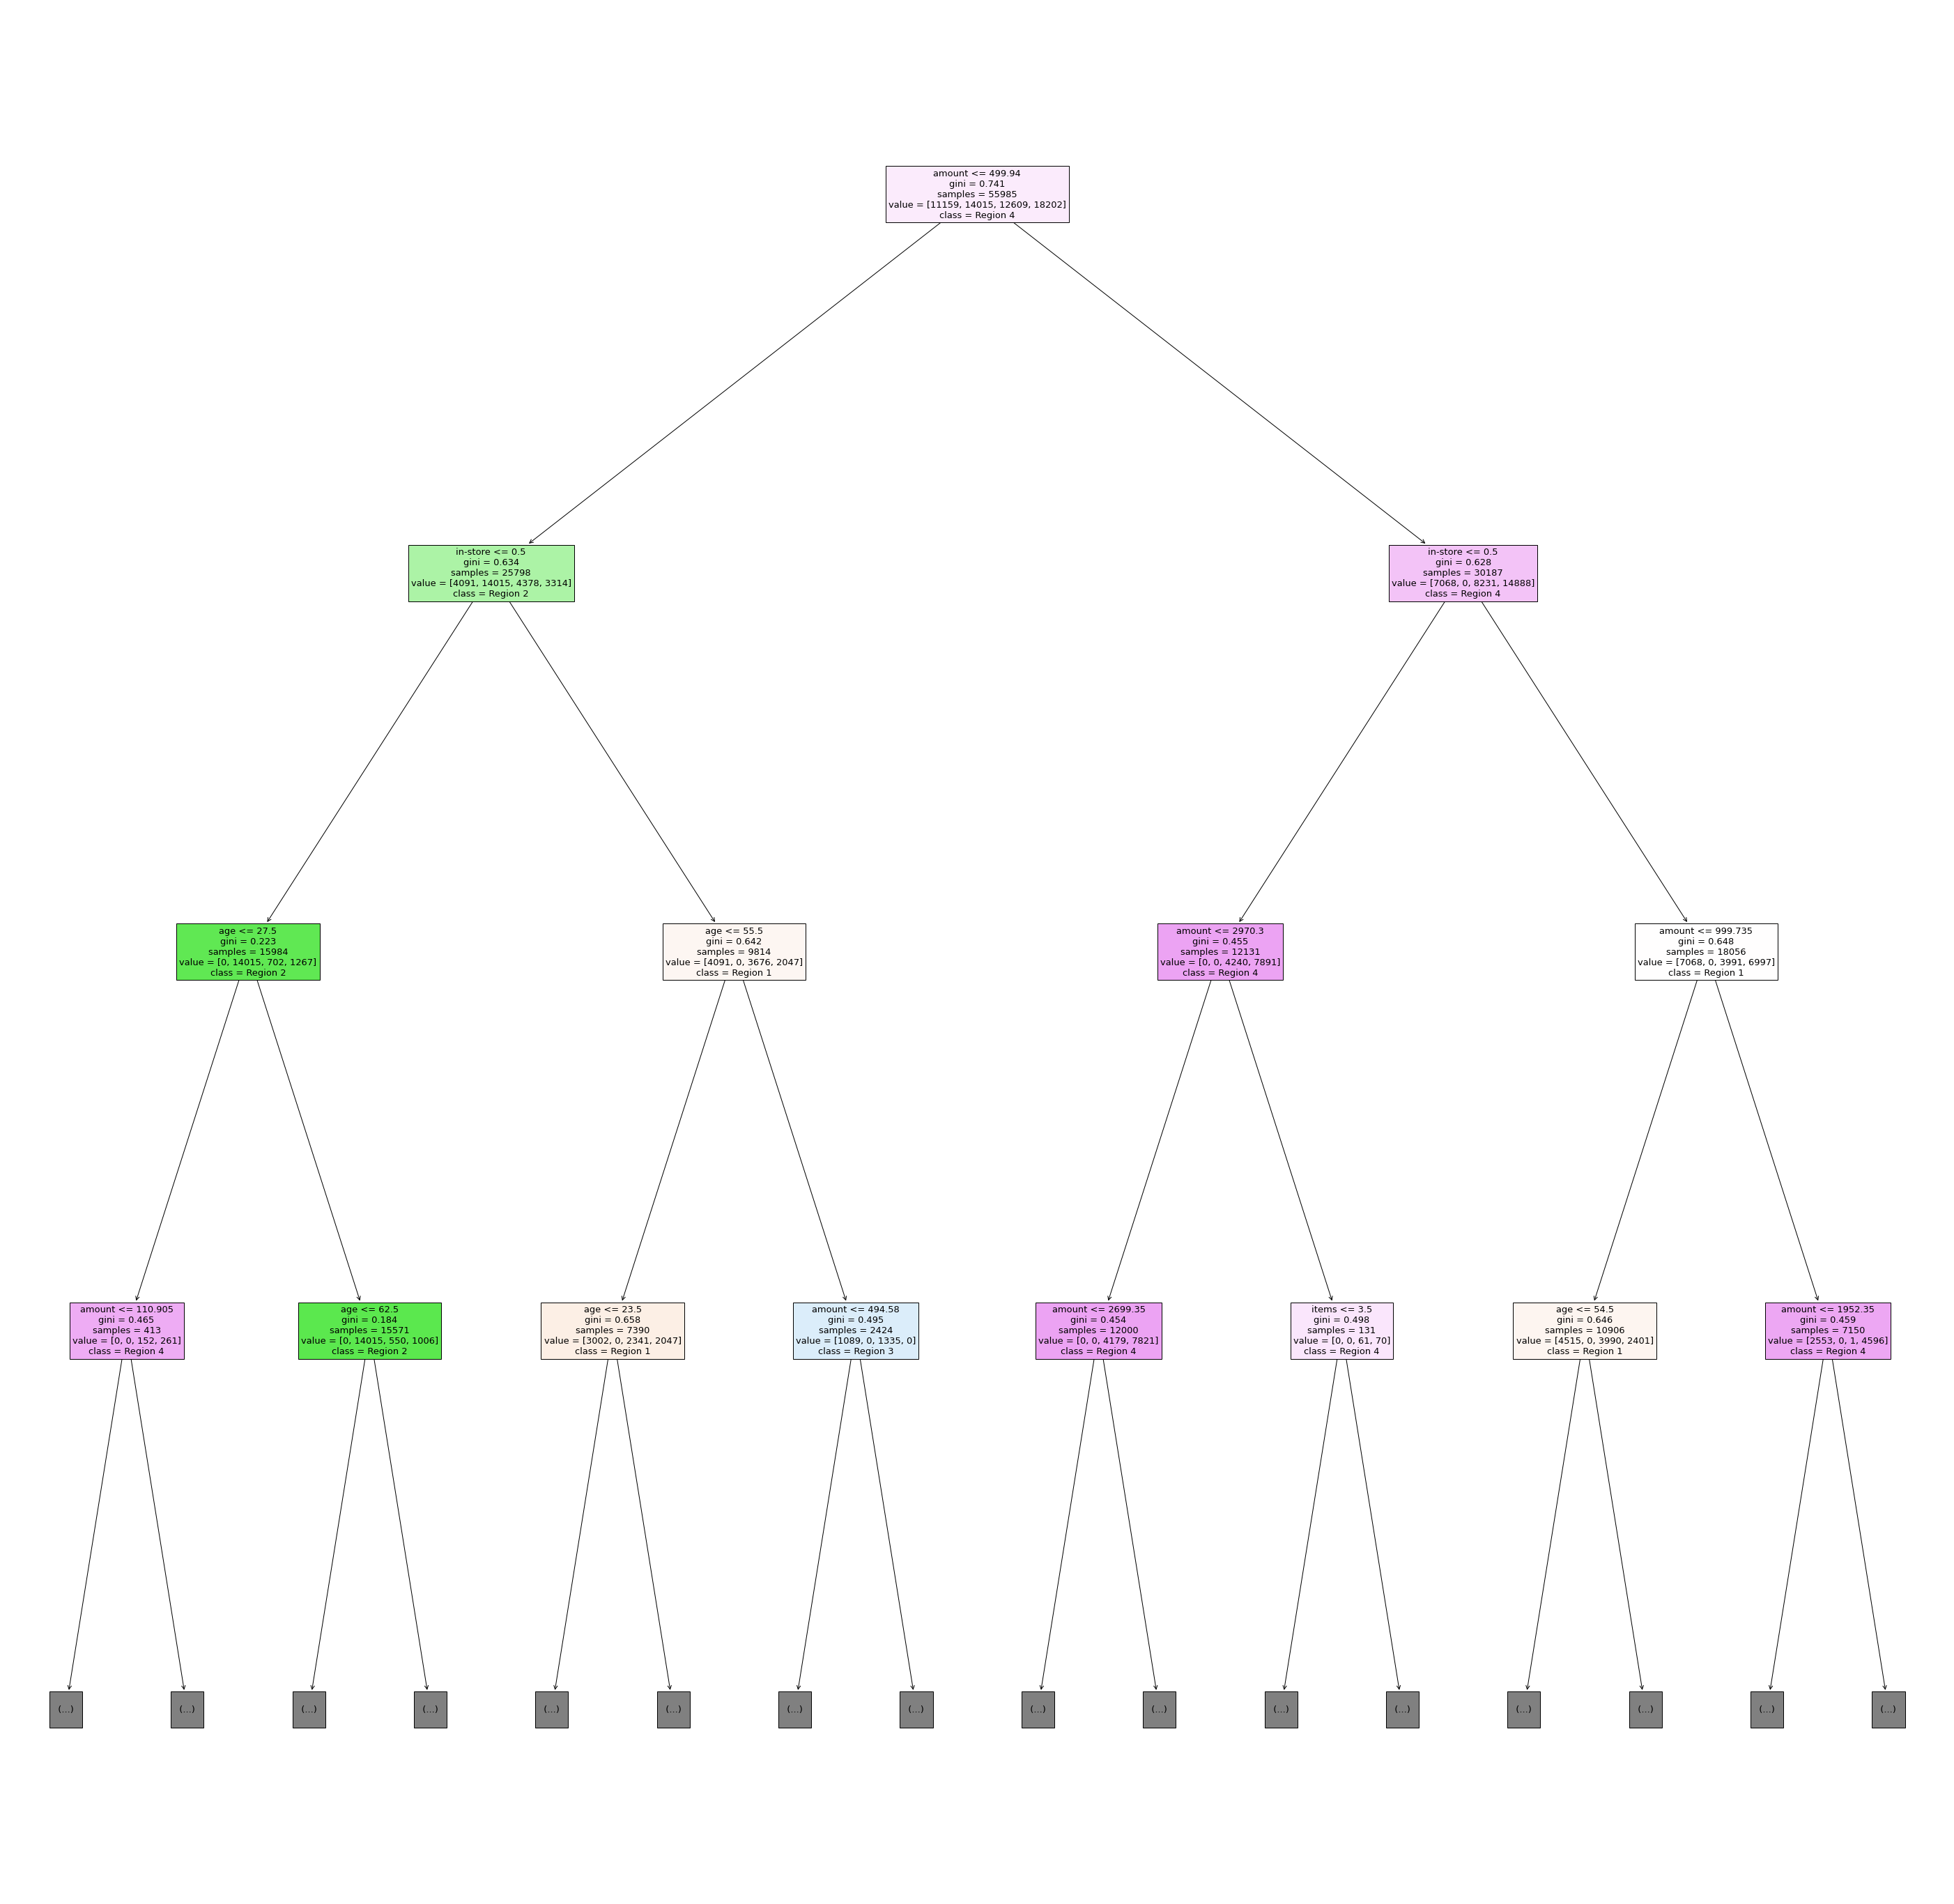

In [302]:
#plot the tree

fig = plt.figure(figsize = (50, 50))

tree = plot_tree(model, max_depth = 3, feature_names = X.columns, 
                 class_names = ['Region 1', 'Region 2', 'Region 3', 'Region 4'], filled = True, fontsize = 13)

## Confusion Matrix

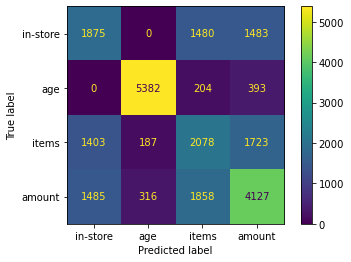

In [196]:
#import module
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, display_labels = X.columns)

## Accuracy score of model

In [199]:
#check score for training...score is very good, 99.9%
#model is overfit

model.score(X_train, y_train)

0.9998213807269805

In [200]:
#testing score is not great, 56%

model.score(X_test, y_test)

0.5610569308993915

## Accuracy score for different model depths

In [201]:
train_accuracy = []
test_accuracy = []
for depth in range(1,50):
    model = DecisionTreeClassifier(max_depth = depth, random_state = 123)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

In [202]:
#graph the accuracy for each 'depth' of tree 

frame = pd.DataFrame({'max_depth': range(1, 50), 'train_acc': train_accuracy, 'test_acc': test_accuracy})
frame.head()

,max_depth,train_acc,test_acc
0,1,0.516263,0.515712
1,2,0.590605,0.589981
2,3,0.636153,0.635117
3,4,0.643762,0.639702
4,5,0.646780,0.641285


No handles with labels found to put in legend.


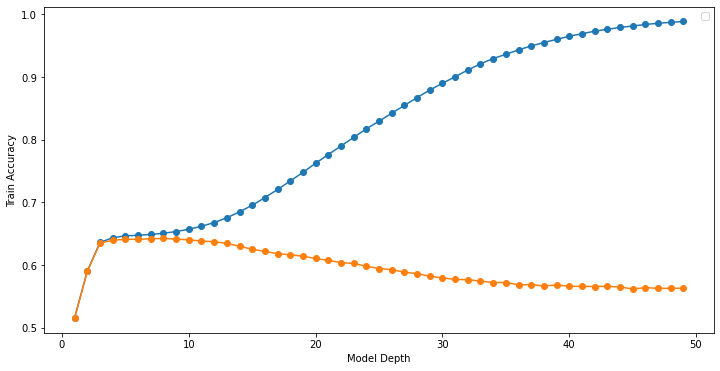

In [203]:
plt.figure(figsize = (12, 6))
plt.plot(frame['max_depth'], frame['train_acc'], marker = 'o')
plt.plot(frame['max_depth'], frame['test_acc'], marker = 'o')
plt.xlabel('Model Depth')
plt.ylabel('Train Accuracy')
plt.legend()

#greater depth increases accuracy of training but decreases accuracy of testing
#so...this doesn't seem like the best model

## Cross Validation score

In [204]:
#print cross validation score

print(cross_val_score(model, X, y, cv = 3)) #cv = number of folds being held out

[0.5627907  0.56492873 0.56187404]


# Random Forest Classifier

In [205]:
#lets try with Random Forest classifier

#create a Gaussian classifier
clf = RandomForestClassifier(n_estimators = 100)

#train model using the training sets
forest_model = clf.fit(X_train, y_train)

#make predictions
forest_pred = clf.predict(X_test)

In [206]:
#check the accuracy score for testing
#still not very accurate - 58%, but better than the other

forest_model.score(X_test, y_test)

0.5786029840793532

In [207]:
#check the accuracy for training

forest_model.score(X_train, y_train)

0.9997856568723765

In [208]:
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

           1       0.39      0.38      0.39      4838
           2       0.91      0.96      0.93      5979
           3       0.38      0.36      0.37      5391
           4       0.56      0.57      0.56      7786

    accuracy                           0.58     23994
   macro avg       0.56      0.56      0.56     23994
weighted avg       0.57      0.58      0.57     23994



## Feature importance for Random Forest Model

In [209]:
#checking for feature importance
#amount has the highest feature importance, with the others not being as important
#items has the least importance

feature_imp = pd.Series(clf.feature_importances_, index = X.columns).sort_values(ascending = False)
print(feature_imp)

amount      0.619108
in-store    0.172001
age         0.167434
items       0.041457
dtype: float64


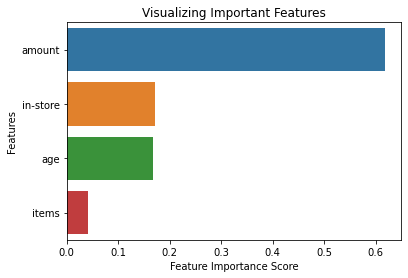

In [210]:
#create a bar plot illustrating these features

sn.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# Gradient Boosting Classifier

In [211]:
from sklearn.preprocessing import MinMaxScaler #do i need this?
#from sklearn.ensemble import GradientBoostingClassifier  <-- need this, which was imported earlier

X = data.iloc[:,0:4]
y = data['region']
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

## Learning Rates

In [213]:
#set different learning rates for the algorithm, so we can determine which is best
#first start by making a list of learning rates

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list: 
    gb_clf = GradientBoostingClassifier(n_estimators = 20, learning_rate = learning_rate, 
                                        max_depth = 3, random_state = 123)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (testing): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    
#I'm going to choose 0.25 as the best

Learning rate:  0.05
Accuracy score (training): 0.643
Accuracy score (testing): 0.642
Learning rate:  0.075
Accuracy score (training): 0.643
Accuracy score (testing): 0.641
Learning rate:  0.1
Accuracy score (training): 0.644
Accuracy score (testing): 0.642
Learning rate:  0.25
Accuracy score (training): 0.647
Accuracy score (testing): 0.643
Learning rate:  0.5
Accuracy score (training): 0.649
Accuracy score (testing): 0.641
Learning rate:  0.75
Accuracy score (training): 0.651
Accuracy score (testing): 0.640
Learning rate:  1
Accuracy score (training): 0.653
Accuracy score (testing): 0.637


Classification Report
              precision    recall  f1-score   support

           1       0.40      0.53      0.46      4838
           2       0.90      1.00      0.95      5979
           3       0.53      0.22      0.32      5391
           4       0.65      0.73      0.69      7786

    accuracy                           0.64     23994
   macro avg       0.62      0.62      0.60     23994
weighted avg       0.64      0.64      0.62     23994



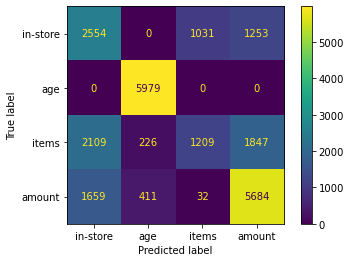

In [214]:
#create another model using the learning rate found in the previous step

gb_clf2 = GradientBoostingClassifier(n_estimators = 20, learning_rate = 0.25, max_depth = 3, random_state = 123)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

#plot a confusion matrix
plot_confusion_matrix(gb_clf2, X_test, y_test, display_labels = X.columns)

#print a classification report
print("Classification Report")
print(classification_report(y_test, predictions))

# Using Cross-Validation to compare models

In [215]:
#lets compare the two different models
#first we will create an empty list and append it with both algorithms

algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

In [216]:
#create an empty list to store the results, and another to hold the names of the algorithms
#classification

results = [] #empty list for results
names = [] #empty list for algorithm names
for name, model in algos_Class: #for loop
    result = cross_val_score(model, X, y, cv = 3, scoring = 'accuracy') #find cross val score
    names.append(name)
    results.append(result)

In [217]:
#print name, and average of cv result for each
#Random Forest has a slightly better score

for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.5846034162241
Decision Tree Classifier 0.5621100471862029


# Removing 'items' from the feature set
Removing the 'least important' feature

In [218]:
#what happens when we remove 'items' from the feature set? Since it's the least important feature?

X2 = data[['amount', 'in-store', 'age']] 
y2 = data['region']


X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.3, random_state = 123)

In [219]:
#build the model and make predictions

algo2 = DecisionTreeClassifier()
model2 = algo2.fit(X_train, y_train)
pred2 = algo2.predict(X_test)

In [220]:
#this didn't really improve anything

model2.score(X_test, y_test)

0.5572643160790197

In [221]:
model2.score(X_train, y_train)

0.998392426542824

In [222]:
#try with random forest
clf2 = RandomForestClassifier(n_estimators = 100)

#train model using the training sets
forest_model2 = clf2.fit(X_train, y_train)

#make predictions
forest_pred2 = clf2.predict(X_test)

In [223]:
#check score with this forest model

forest_model2.score(X_test, y_test)

0.5622238893056597

# Discretization

In [224]:
#lets try discretization

from sklearn.preprocessing import KBinsDiscretizer #import the module

disc_ew = KBinsDiscretizer(n_bins = 3, encode = 'ordinal', strategy = 'uniform') #equal width
disc_ef = KBinsDiscretizer(n_bins = 3, encode = 'ordinal', strategy = 'quantile') #equal frequency

#these will not let you specify one single variable, but will have to apply to entire dataset (I think)
#so we will try a different method

## Discretization for 'Age'
Discretize 'age' and use as the dependent variable for our model. <br>
After testing with 'age' as the dependent variable, it doe not seem that 'age' is a good metric to use.

In [306]:
#try using pd.cut
#data['age_bins'] will save a separate column for age

data['age_bins'] = pd.cut(x = data['age'], bins = [17, 25, 40, 56, 75, 90], labels = False)

#17-24 = gen z
#25-39 = millenials
#40-55 = gen x
#56-75 = boomers
#76+ = silent gen

In [307]:
data.corr()

,in-store,age,items,amount,region,amt_bins,age_bins
in-store,1.000000,-0.178180,-0.003897,-0.085573,-0.133171,-0.088246,-0.179136
age,-0.178180,1.000000,0.000657,-0.282033,-0.235370,-0.275067,0.957374
items,-0.003897,0.000657,1.000000,0.000384,-0.001904,0.000390,0.000600
amount,-0.085573,-0.282033,0.000384,1.000000,0.403486,0.974391,-0.270521
region,-0.133171,-0.235370,-0.001904,0.403486,1.000000,0.393758,-0.224858
amt_bins,-0.088246,-0.275067,0.000390,0.974391,0.393758,1.000000,-0.263582
age_bins,-0.179136,0.957374,0.000600,-0.270521,-0.224858,-0.263582,1.000000


In [265]:
data.head()

,in-store,age,items,amount,region,age_bins,amt_bins
0,0,37,4,281.03,2,1,0
1,0,35,2,219.51,2,1,0
2,1,45,3,1525.70,4,2,2
3,1,46,3,715.25,3,2,1
4,1,33,4,1937.50,1,1,3


In [331]:
#now lets creating a new model with binned age as the dependent variable

Z = data.drop(['age', 'age_bins', 'amt_bins'], axis = 1)
w = data['age_bins']
Z.head()

,in-store,items,amount,region
0,0,4,281.03,2
1,0,2,219.51,2
2,1,3,1525.70,4
3,1,3,715.25,3
4,1,4,1937.50,1


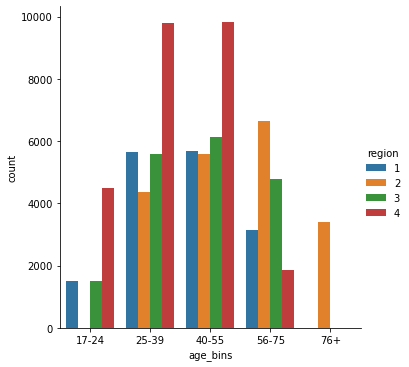

In [332]:
#a quick plot to check the distribution of age into 5 bins...
#adding region as hue to see number of people of each age bracket in each region

fig = sn.catplot(x = 'age_bins', data = data, hue = 'region', kind = 'count')
fig.set(xticklabels = ['17-24','25-39','40-55', '56-75', '76+'])

#plt.savefig('agevsregion.png')

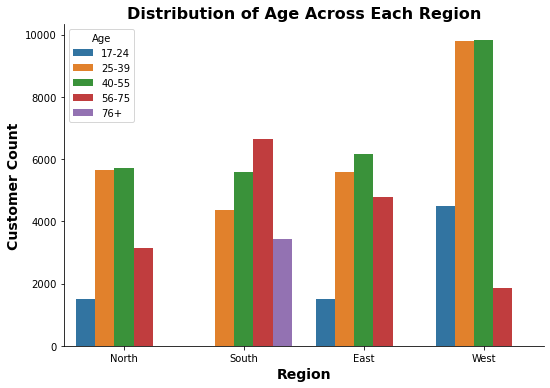

In [354]:
fig2 = sn.catplot(x = 'region', data = data, hue ='age_bins', kind = 'count', legend = False, aspect = 1.5)
plt.legend(title='Age', loc='upper left', labels=['17-24','25-39','40-55', '56-75', '76+'])
plt.xlabel('Region', weight = 'bold', fontsize = 14)
plt.ylabel('Customer Count', weight = 'bold', fontsize = 14)
plt.title('Distribution of Age Across Each Region', weight = 'bold',  fontsize = 16)
fig2.set(xticklabels = ['North', 'South', 'East', 'West'])
plt.show(fig2)

#plt.savefig('regionvsage.png')

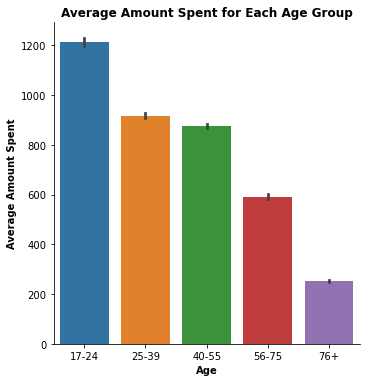

In [334]:
#amount spent for each age bin

fig3 = sn.catplot(x = 'age_bins', y = 'amount', data = data, kind = 'bar')
plt.title('Average Amount Spent for Each Age Group', weight = 'bold')
plt.xlabel('Age', weight = 'bold')
plt.ylabel('Average Amount Spent', weight = 'bold')

fig3.set(xticklabels = ['17-24','25-39','40-55', '56-75', '76+'])

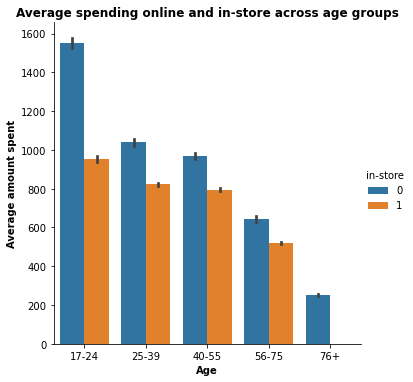

In [335]:
#online vs instore spending across age groups

fig4 = sn.catplot(x = 'age_bins', y = 'amount', data = data, kind = 'bar', hue = 'in-store')
plt.title('Average spending online and in-store across age groups', weight = 'bold')
plt.xlabel('Age', weight = 'bold')
plt.ylabel('Average amount spent', weight = 'bold')
fig4.set(xticklabels = ['17-24','25-39','40-55', '56-75', '76+'])

In [336]:
X_train, y_train, X_test, y_test = X_train, X_test, y_train, y_test = train_test_split(Z, w, test_size = 0.3, random_state = 123)

### Decision Tree Classifier
Decision tree with discretized 'age' as dependent variable

In [337]:
algo = DecisionTreeClassifier()
age_model = algo.fit(X_train, y_train)
pred = age_model.predict(X_test)

In [338]:
age_model.score(X_test, y_test)

#not a great score

0.30436775860631826

In [339]:
#used this to find out what was wrong with binning strategy
#age_bins had some null values, because i hadn't set the age low enough

print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
amt_bins    0
age_bins    0
dtype: int64


In [340]:
print(cross_val_score(model, Z, w, cv = 3))

[0.3055889  0.30596399 0.30117409]


In [341]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.16      0.16      0.16      2288
           1       0.33      0.33      0.33      7536
           2       0.35      0.35      0.35      8196
           3       0.29      0.28      0.29      4957
           4       0.16      0.16      0.16      1017

    accuracy                           0.30     23994
   macro avg       0.26      0.26      0.26     23994
weighted avg       0.30      0.30      0.30     23994



In [342]:
feature_imp = pd.Series(age_model.feature_importances_, index = Z.columns).sort_values(ascending = False)
print(feature_imp)

amount      0.794655
items       0.168699
region      0.025217
in-store    0.011429
dtype: float64


### Random Forest Classifier
Random forest classifier with discretized 'age' as the dependent variable

In [237]:
clf_age = RandomForestClassifier(n_estimators = 100)

#train model using the training sets
forest_model_age = clf_age.fit(X_train, y_train)

#make predictions
forest_pred_age = clf_age.predict(X_test)

In [238]:
forest_model_age.score(X_test, y_test)

#still not a great score

0.3084521130282571

### Gradient Boosting
Gradient boosting classifier with discretized 'age' as the dependent variable

In [239]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list: 
    gb_clf3 = GradientBoostingClassifier(n_estimators = 20, learning_rate = learning_rate, 
                                        max_depth = 3, random_state = 123)
    gb_clf3.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf3.score(X_train, y_train)))
    print("Accuracy score (testing): {0:.3f}".format(gb_clf3.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.345
Accuracy score (testing): 0.343
Learning rate:  0.075
Accuracy score (training): 0.360
Accuracy score (testing): 0.353
Learning rate:  0.1
Accuracy score (training): 0.362
Accuracy score (testing): 0.355
Learning rate:  0.25
Accuracy score (training): 0.369
Accuracy score (testing): 0.354
Learning rate:  0.5
Accuracy score (training): 0.377
Accuracy score (testing): 0.350
Learning rate:  0.75
Accuracy score (training): 0.380
Accuracy score (testing): 0.348
Learning rate:  1
Accuracy score (training): 0.384
Accuracy score (testing): 0.349


# Discretization for Amount
Discretize amount and use as our dependent variable.

In [304]:
#lets try discretizing amount
#putting amount into 2 bins seems to give the model the highest scores
#3 bins is also good
#lower amounts tend to be easier to predict than higher amounts

data['amt_bins'] = pd.cut(x = data['amount'], bins = 5, labels = False)
data.head()

,in-store,age,items,amount,region,amt_bins
0,0,37,4,281.03,2,0
1,0,35,2,219.51,2,0
2,1,45,3,1525.70,4,2
3,1,46,3,715.25,3,1
4,1,33,4,1937.50,1,3


In [241]:
A = data.drop(['amount', 'amt_bins', 'age_bins', 'items'], axis = 1)
b = data['amt_bins']
A.head()

,in-store,age,region
0,0,37,2
1,0,35,2
2,1,45,4
3,1,46,3
4,1,33,1


In [242]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.3, random_state = 123)

### Desicion Tree Classifier
Decision tree classifier with discretized 'amount' as dependent variable

In [243]:
algo = DecisionTreeClassifier()
amt_model = algo.fit(A_train, b_train)
pred = amt_model.predict(A_test)

In [244]:
amt_model.score(A_test, b_test)

0.5221305326331583

In [245]:
print(classification_report(b_test, pred))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76     12224
           1       0.28      0.17      0.21      5659
           2       0.27      0.27      0.27      3091
           3       0.20      0.17      0.18      1815
           4       0.21      0.25      0.23      1205

    accuracy                           0.52     23994
   macro avg       0.33      0.34      0.33     23994
weighted avg       0.48      0.52      0.50     23994



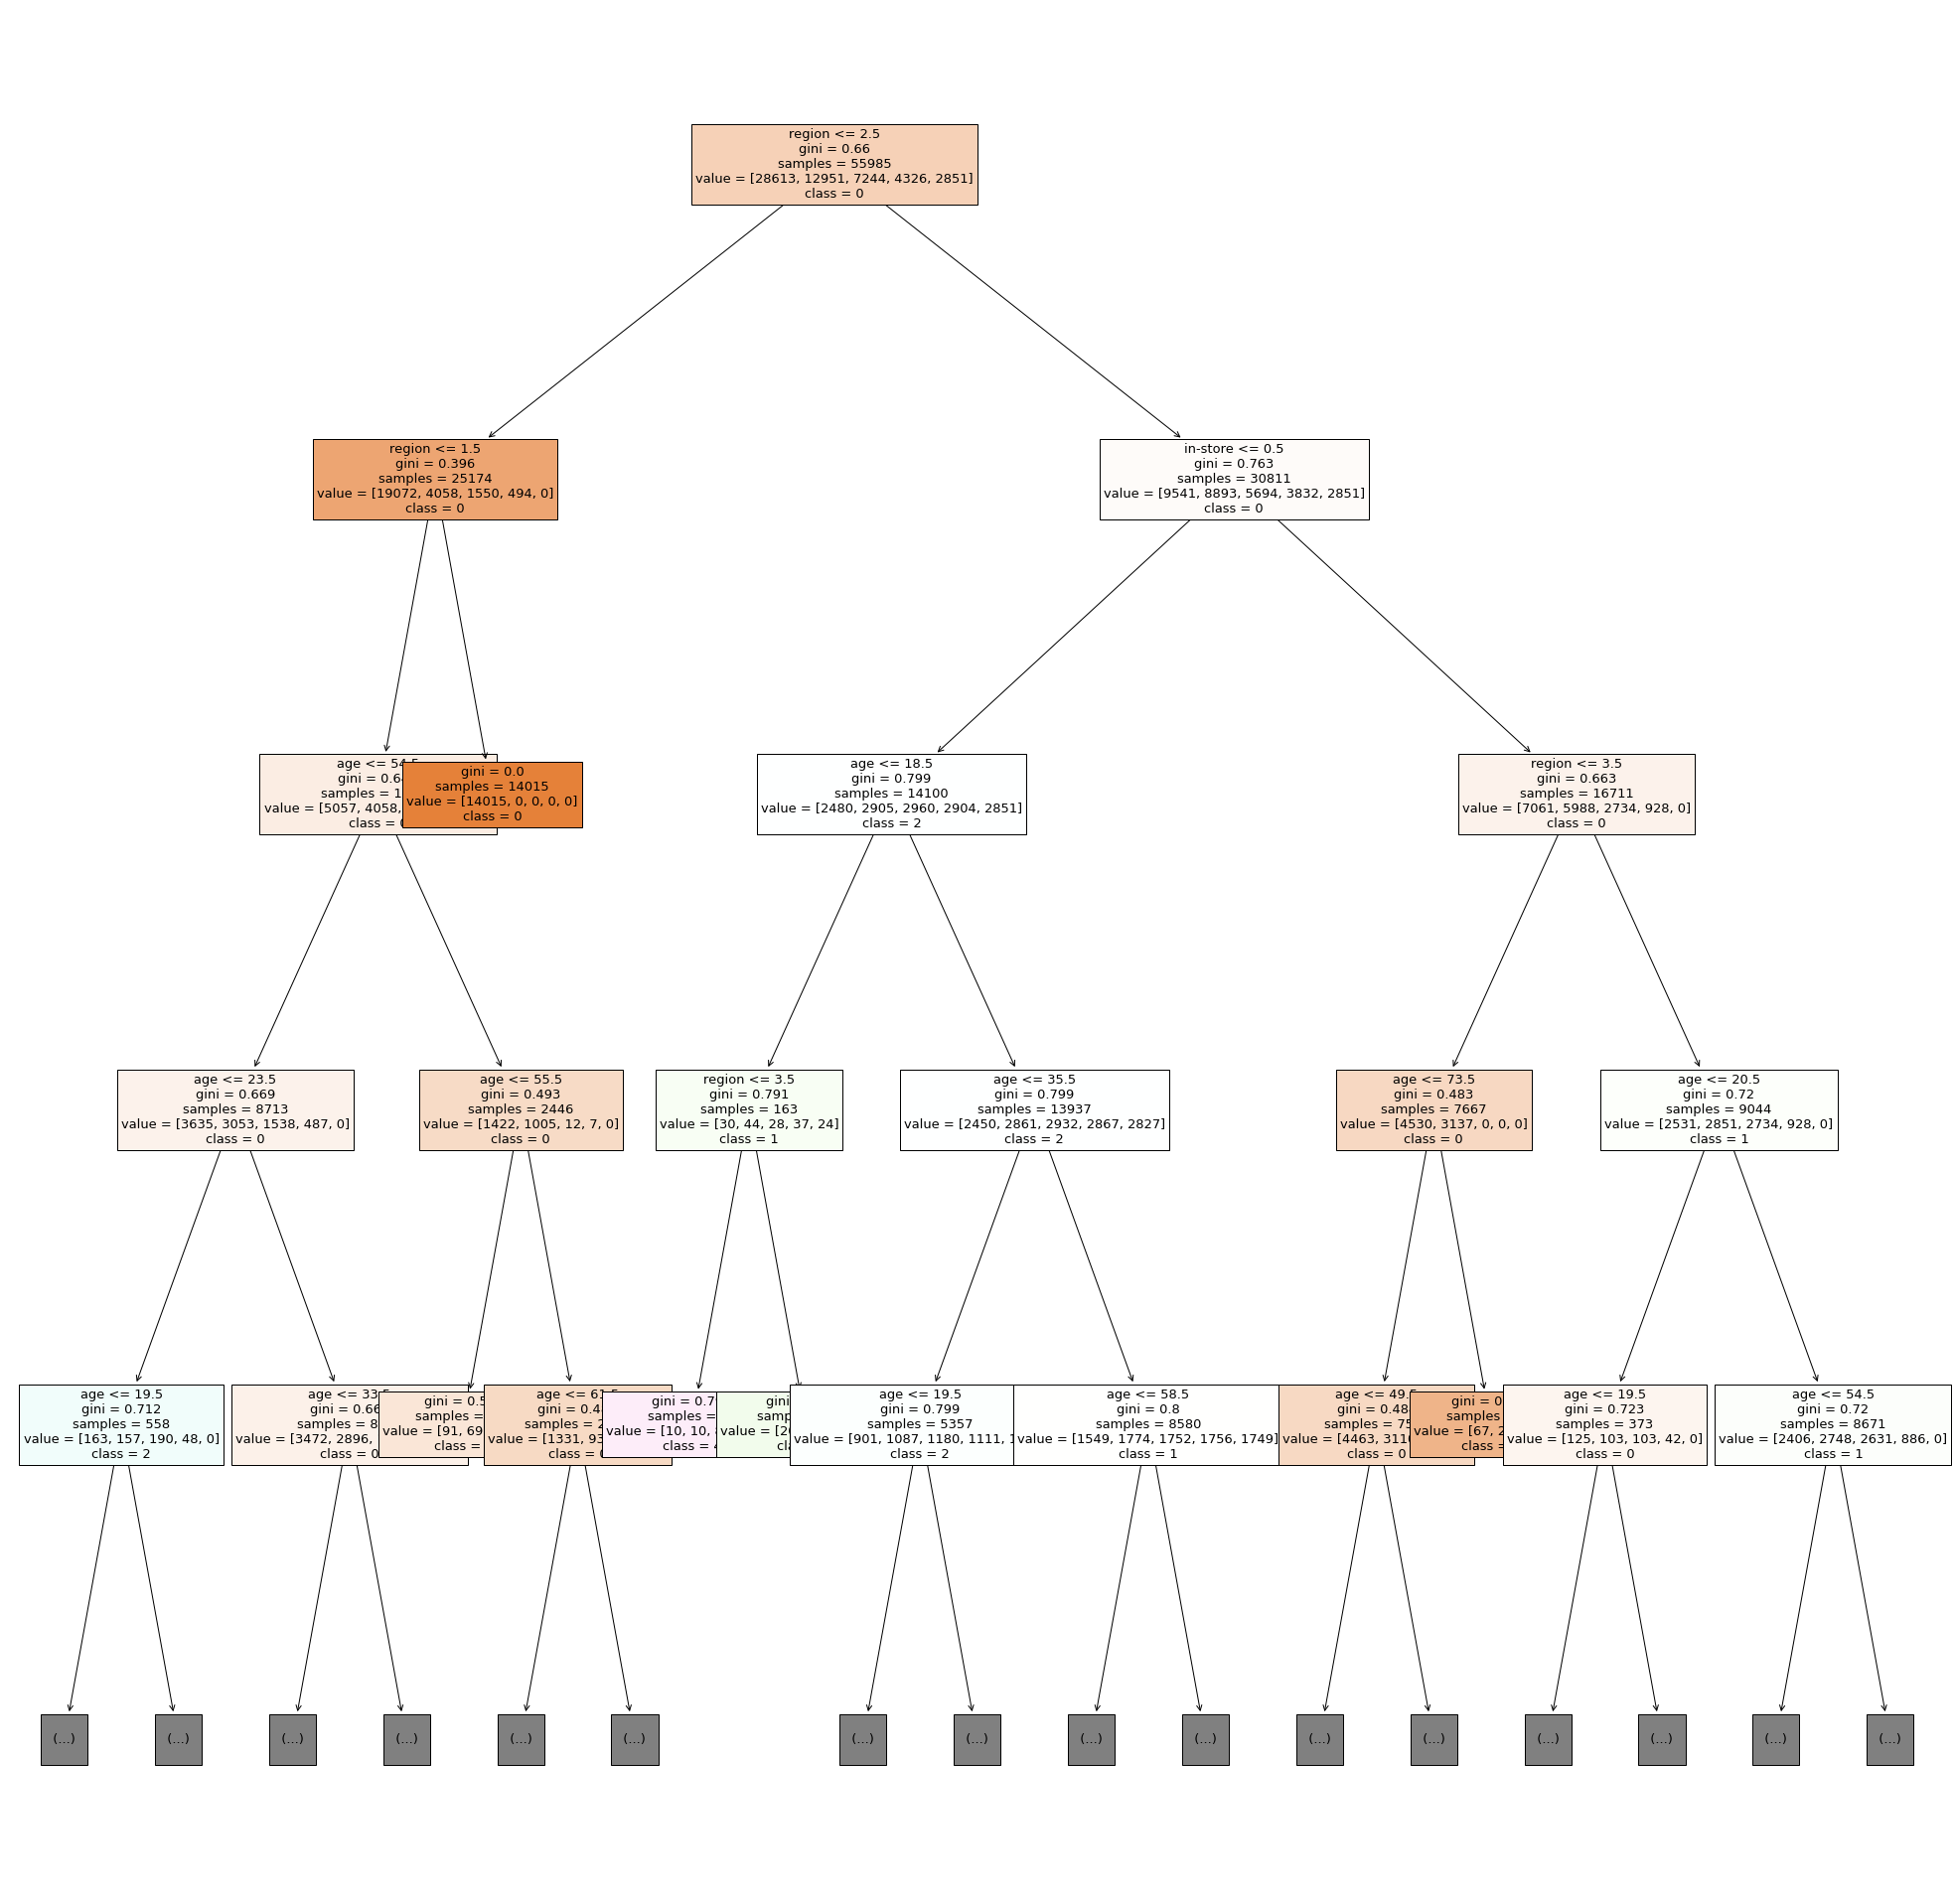

In [246]:
fig = plt.figure(figsize = (35, 35))

tree = plot_tree(amt_model, max_depth = 4, feature_names = A.columns, 
                 class_names = ['0', '1', '2', '3', '4'], filled = True, fontsize = 13)

### Random Forest
Random forest classifier with discretized 'amount' as the dependent variable

In [247]:
clfx = RandomForestClassifier(n_estimators = 100)

#train model using the training sets
forest_modelx = clfx.fit(A_train, b_train)

#make predictions
forest_predx = clfx.predict(A_test)

In [248]:
forest_modelx.score(A_test,b_test)

0.5226723347503542

In [249]:
#this gives the same result as model.score() above

from sklearn import metrics

print('Accuracy Score:',metrics.accuracy_score(b_test, forest_predx))

Accuracy Score: 0.5226723347503542


In [250]:
print(classification_report(b_test, forest_predx))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76     12224
           1       0.28      0.16      0.20      5659
           2       0.27      0.28      0.28      3091
           3       0.21      0.18      0.19      1815
           4       0.22      0.29      0.25      1205

    accuracy                           0.52     23994
   macro avg       0.34      0.35      0.33     23994
weighted avg       0.48      0.52      0.50     23994



In [251]:
#sn.pairplot(data, hue='region', height=1.5)
#look more at this later ... dataset has 0 variance was an issue, plus there is way too much stuff to plot
#still cool though

### Gradient Boosting
Gradient boosting classifier with discretized 'amount' as the dependent variable

In [252]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list: 
    gb_clf4 = GradientBoostingClassifier(n_estimators = 20, learning_rate = learning_rate, 
                                        max_depth = 3, random_state = 123)
    gb_clf4.fit(A_train, b_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf4.score(A_train, b_train)))
    print("Accuracy score (testing): {0:.3f}".format(gb_clf4.score(A_test, b_test)))

Learning rate:  0.05
Accuracy score (training): 0.511
Accuracy score (testing): 0.509
Learning rate:  0.075
Accuracy score (training): 0.512
Accuracy score (testing): 0.509
Learning rate:  0.1
Accuracy score (training): 0.523
Accuracy score (testing): 0.523
Learning rate:  0.25
Accuracy score (training): 0.529
Accuracy score (testing): 0.524
Learning rate:  0.5
Accuracy score (training): 0.532
Accuracy score (testing): 0.525
Learning rate:  0.75
Accuracy score (training): 0.534
Accuracy score (testing): 0.523
Learning rate:  1
Accuracy score (training): 0.535
Accuracy score (testing): 0.524


Classification Report
              precision    recall  f1-score   support

           0       0.72      0.82      0.77     12224
           1       0.28      0.21      0.24      5659
           2       0.25      0.27      0.26      3091
           3       0.20      0.16      0.18      1815
           4       0.20      0.17      0.18      1205

    accuracy                           0.52     23994
   macro avg       0.33      0.33      0.33     23994
weighted avg       0.49      0.52      0.50     23994



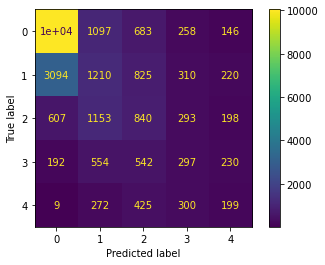

In [253]:
#use learning rate of 0.5

gb_clf4 = GradientBoostingClassifier(n_estimators = 20, learning_rate = 0.5, max_depth = 3, random_state = 123)
gb_clf4.fit(A_train, b_train)
predictions = gb_clf4.predict(A_test)

plot_confusion_matrix(gb_clf4, A_test, b_test)

#print a classification report
print("Classification Report")
print(classification_report(b_test, predictions))

In [254]:
#i want to see my min and max for 'amount' so i can see how the bins are divided

data['amount'].describe()

count    79979.000000
mean       835.825727
std        721.263650
min          5.004700
25%        285.120000
50%        582.140000
75%       1233.400000
max       3000.000000
Name: amount, dtype: float64

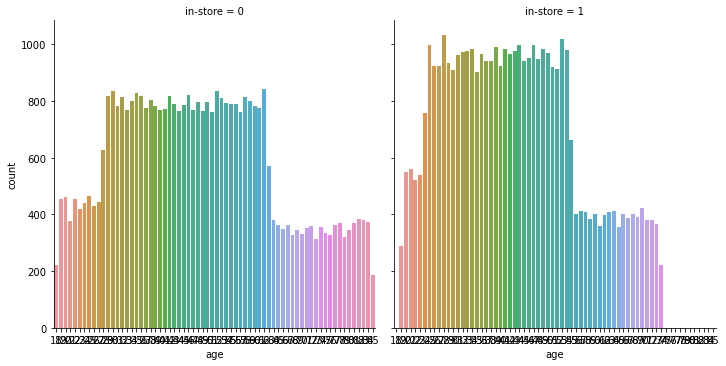

In [255]:
#look at distribution of age comparing in-store and online purchases

sn.catplot(x = 'age', data = data, col = 'in-store', kind = 'count')

# In-store as dependent variable

In [256]:
X = data[['age', 'amount', 'region', 'items']]
y = data['in-store']

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [258]:
algo = DecisionTreeClassifier()
model = algo.fit(X_train, y_train)
pred = model.predict(X_test)

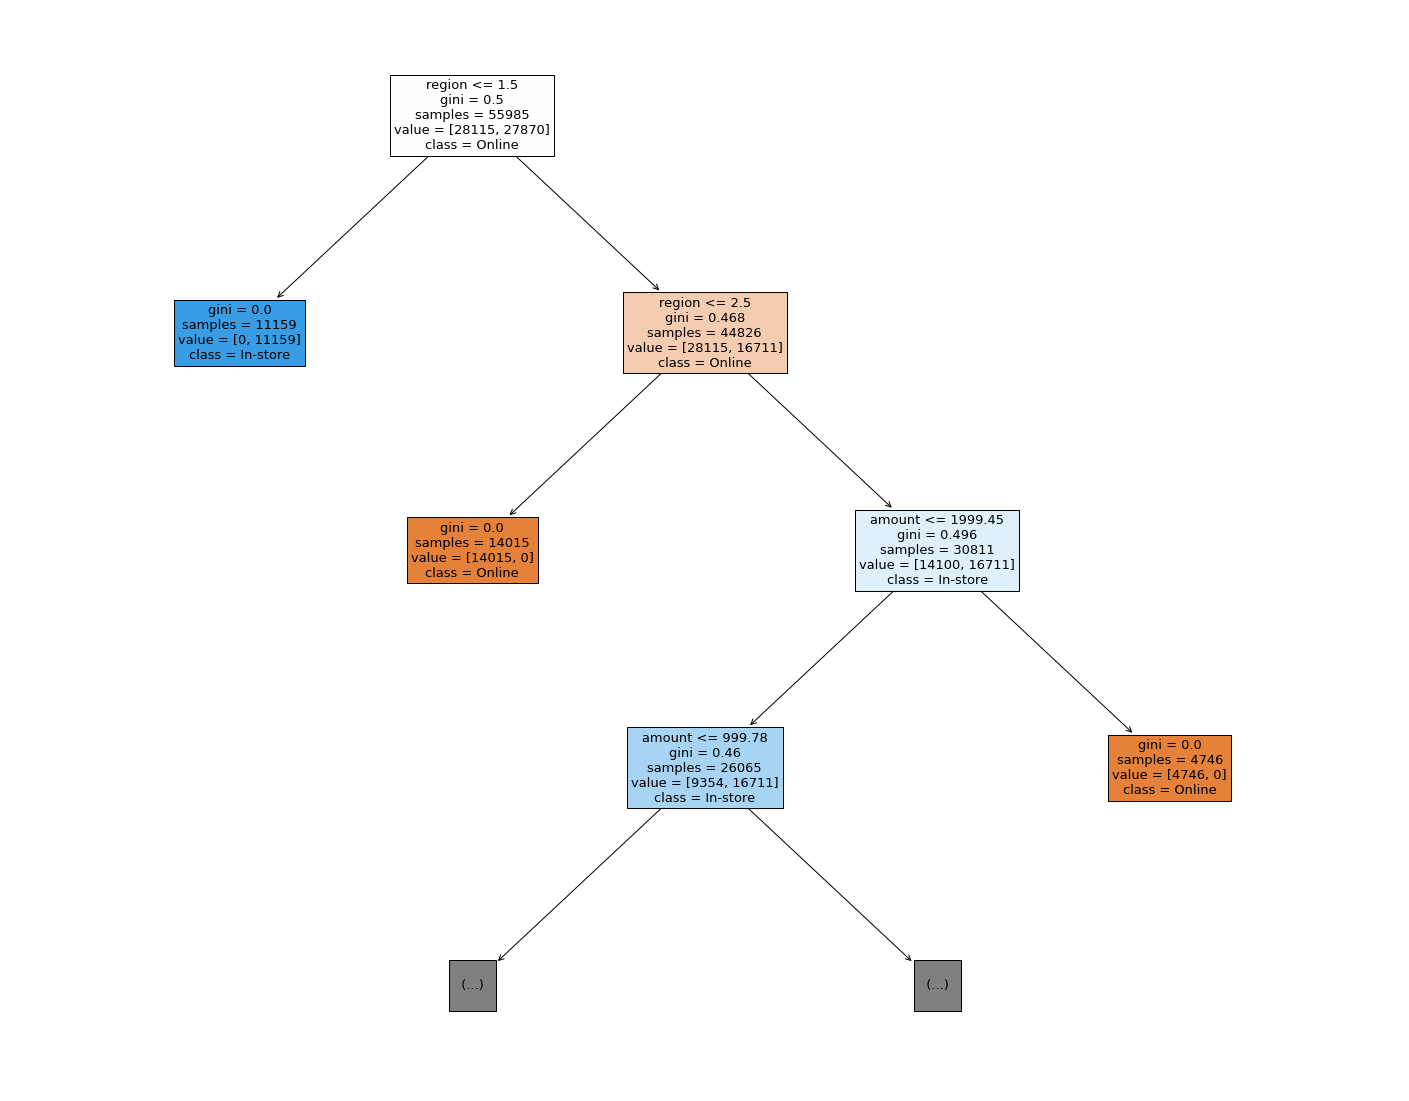

In [259]:
fig = plt.figure(figsize = (25, 20))

tree = plot_tree(model, max_depth = 3, feature_names = X.columns, 
                 class_names = ['Online', 'In-store'], filled = True, fontsize = 13)

In [260]:
model.score(X_test, y_test)

0.8463782612319747

In [261]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85     11874
           1       0.85      0.84      0.85     12120

    accuracy                           0.85     23994
   macro avg       0.85      0.85      0.85     23994
weighted avg       0.85      0.85      0.85     23994



In [262]:
feature_imp = pd.Series(model.feature_importances_, index = X.columns).sort_values(ascending = False)
print(feature_imp)

region    0.503682
amount    0.346794
age       0.104910
items     0.044614
dtype: float64
